In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df=pd.read_csv('gaiaqueryresults.csv')
df.shape

(206, 163)

In [4]:
df.drop(columns='ourgaiaids_oid', inplace=True)

In [5]:
milliarcsecs=df.parallax.values

In [6]:
arcsecs=milliarcsecs/1000

In [7]:
parsecs=1/arcsecs

In [8]:
df['distance']=parsecs

In [9]:
distancemod=-5*np.log10(parsecs)+5

In [10]:
df['g_absmag']=df['phot_g_mean_mag']+distancemod
df['bp_absmag']=df['phot_bp_mean_mag']+distancemod
df['rp_absmag']=df['phot_rp_mean_mag']+distancemod

In [11]:
df['abs_g_rp']=df['g_absmag']-df['rp_absmag']
df['abs_bp_rp']=df['bp_absmag']-df['rp_absmag']
df['abs_bp_g']=df['bp_absmag']-df['g_absmag']

In [12]:
#df[df['gaiadr3_source_id']==6049554108931809152] #getting info on specific star

In [13]:
#df.g_absmag.max()

In [14]:
#df[df['g_absmag']==12.520974257424804]

In [15]:
df

,pop_id,TIC,gaiadr3_source_id,epic_id,per,group,age_Myr,disco_paper,author,year,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g
0,0,59129133.0,3392549449695395968,246676629.0,0.625300,Taurus,2.0,Stauffer_2018,Stauffer,2018,1.636148e+18,Gaia DR3 3392549449695395968,3.392549e+18,8.915612e+08,2016.0,74.868432,0.111448,14.273220,0.073369,6.345332,0.123571,51.349617,20.650896,9.782701,0.145434,-18.186762,0.111691,0.051954,-0.050209,-0.191040,0.311841,-0.336029,0.209831,-0.080116,0.088596,-0.050038,0.063916,273.0,0.0,267.0,6.0,100.504940,15574.92400,0.873336,379.500430,31.0,False,1.249483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,16.0,0.203500,31.0,10.0,0.0,0.061194,94.721010,2.0,0.0,7.779637,0.221644,0.425816,0.324400,0.367743,-78.520400,-10.462833,-32.753910,40.739166,False,252.0,45288.319681,72.015495,628.86910,14.047401,28.0,7331.629218,56.008920,130.901110,15.675541,28.0,60414.265001,354.256350,170.538270,12.795047,1.495880,0.0,1.0,0.0,1.0,0.0,2.880494,1.628140,1.252355,12.816790,4.137138,2.0,17.0,7.0,11.0,15.554990,NaN,NaN,914.81240,NaN,3600.0,4.5,0.50,101.0,NaN,NaN,NaN,12.196191,0.018861,12.0,NaN,VARIABLE,186.423467,-17.000876,75.184000,-8.391186,False,False,0.0,True,True,False,True,False,True,True,False,1.196147e-13,5.97469

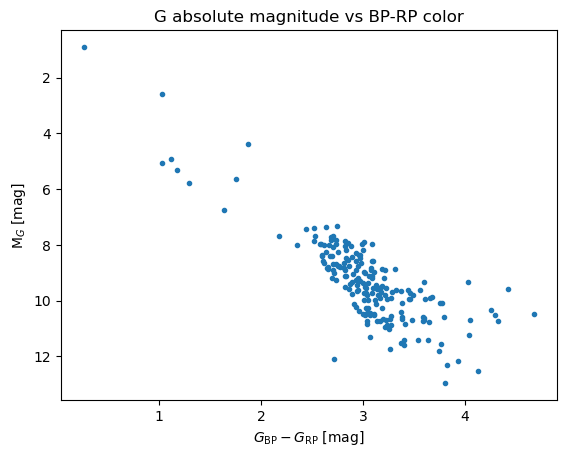

In [16]:
plt.scatter(df.abs_bp_rp,df.g_absmag,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.show()

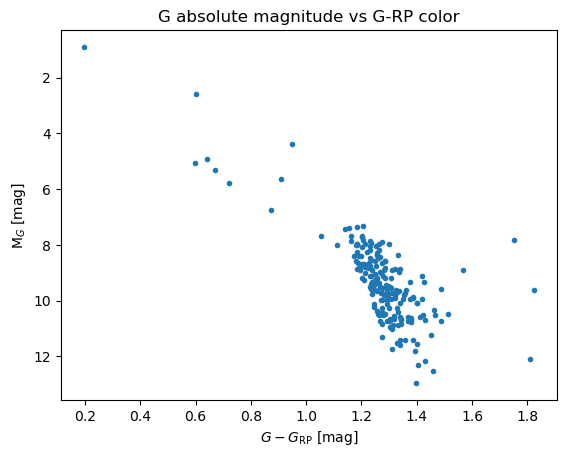

In [17]:
plt.scatter(df.abs_g_rp,df.g_absmag,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

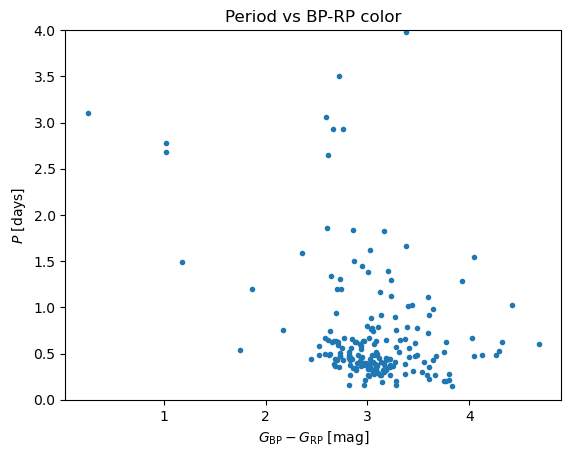

In [18]:
plt.scatter(df.abs_bp_rp,df.per,marker='.')
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs BP-RP color')
plt.ylim(0,4) #cutting out some outliers for better visibility
plt.show()

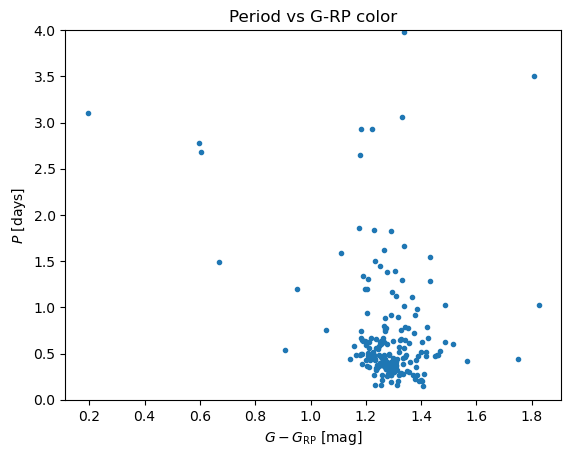

In [19]:
plt.scatter(df.abs_g_rp,df.per,marker='.')
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('Period vs G-RP color')
plt.ylim(0,4) #cutting out some outliers for better visibility
plt.show()

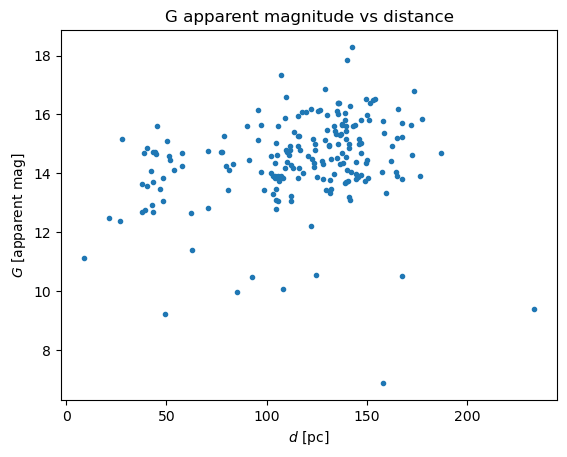

In [20]:
plt.scatter(df.distance,df.phot_g_mean_mag,marker='.')
plt.ylabel(r'$G$ [apparent mag]')
plt.xlabel(r'$d$ [pc]')
plt.title('G apparent magnitude vs distance')
plt.show()

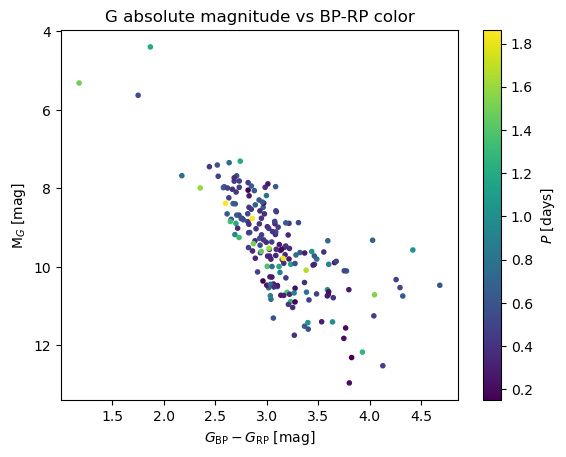

In [21]:
#first filter out period above 2
filtereddf=df[df['per']<=2]
plt.scatter(filtereddf.abs_bp_rp,filtereddf.g_absmag,c=filtereddf.per,marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
plt.show()

In [22]:
#okay still hard to see the period variation so going to try a log scale instead of filtering
import matplotlib.colors as colors

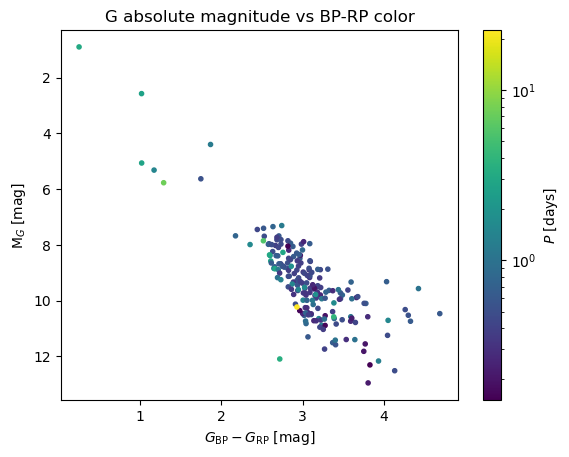

In [23]:
plt.scatter(df.abs_bp_rp,df.g_absmag,c=df.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
plt.show()

In [24]:
from matplotlib.ticker import FuncFormatter

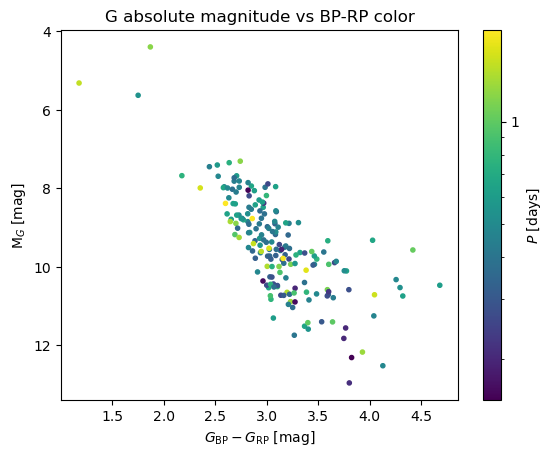

In [25]:
#do the filtering too
plt.scatter(filtereddf.abs_bp_rp,filtereddf.g_absmag,c=filtereddf.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

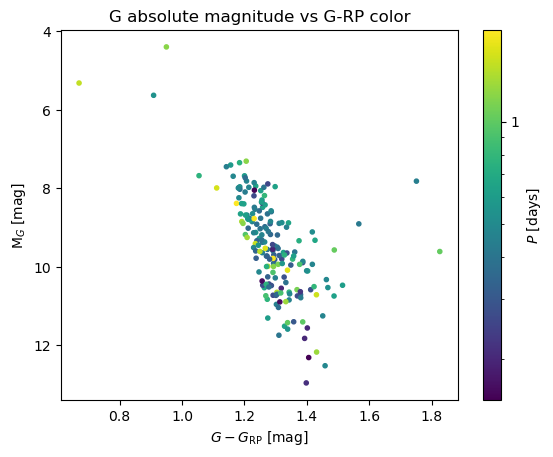

In [26]:
plt.scatter(filtereddf.abs_g_rp,filtereddf.g_absmag,c=filtereddf.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$P$ [days]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()